# Task 1

In [113]:
import json 
import pandas as pd

def load_postman(folder):
    file_size = ['10kb', '100kb', '1mb', '10mb']
    
    results = {}

    for size in file_size:
        with open(f'{folder}/{size}-test-get.postman_test_run.json') as f:
            postman = json.loads(f.read())
            results[size] = postman['results'][0]['times']

            # zero padding to 100
            if (length := len(postman['results'][0]['times'])) < 100:
                results[size] += [0 for _ in range(100 - length)]
        
        # remove 5 smallest and 5 highest
        results[size].sort()
        results[size] = results[size][5:95]

    return results

In [3]:
def load_textfile(folder):
    file_size = ['10kb', '100kb', '1mb', '10mb']

    with open(folder, 'r') as f:
        times = f.read()
        
    results = {}
    for line in times.split('\n'):
        r = line.split(': ')
        
        if len(r) > 1:
            size = r[1].split(',')[0]

        if not len(results.get(size, [])):
            results[size] = []
        
        try:
            results[size].append(float(r[-1]) * 1000)
        except ValueError:
            pass

    # remove 5 smallest and 5 highest
    for key in results.keys():
        results[key].sort()
        results[key] = results[key][5:95]
    return results

## Task 1.1

In [83]:
import numpy as np 
import matplotlib.lines as mlines

def plot_hist(df, ):
    axs = df.hist(bins=30, figsize=(12,12))

    axs = np.ravel(axs)

    for i, col in enumerate(df.columns):
        m_ax = axs[i].twinx()
        m_ax.set_ylim(0, 1)
        m_ax.vlines(df[col].mean(), 1, 0, color='r', linestyle='--', linewidth=2, label=f'Mean = {df[col].mean():.2f}')
        m_ax.vlines(df[col].median(), 1, 0, color='orange', linestyle='--', linewidth=2, label=f'Median = {df[col].median():.2f}')
        m_ax.get_yaxis().set_ticks([])
        m_ax.legend()
        axs[i].set_ylabel('File Count')
        axs[i].set_xlabel('Time [ms]')

    fig = axs[0].get_figure()
    fig.tight_layout()

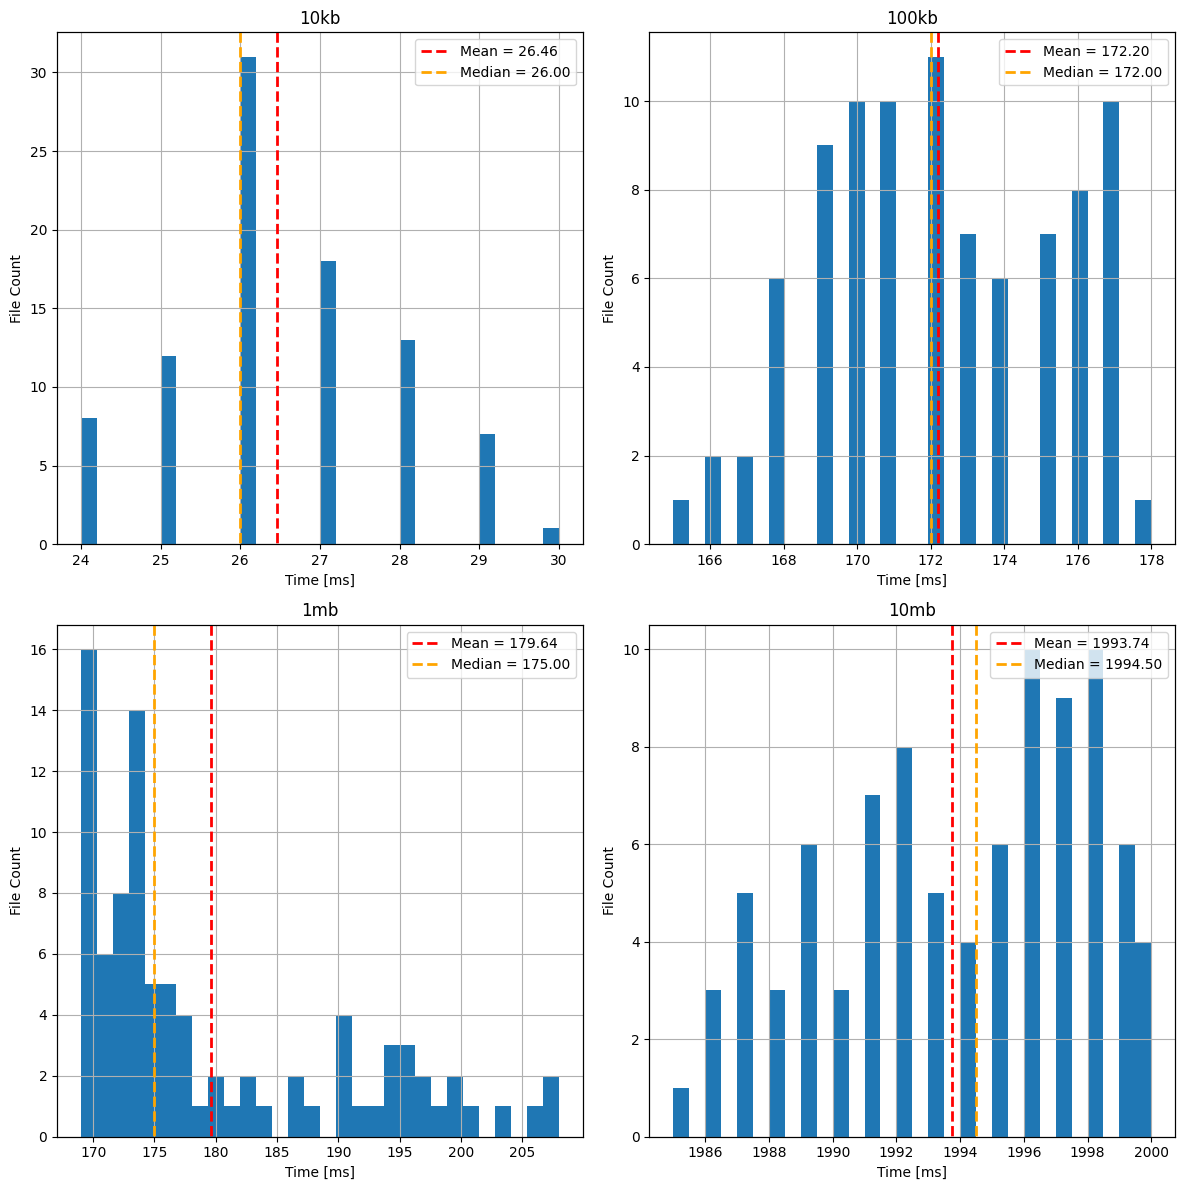

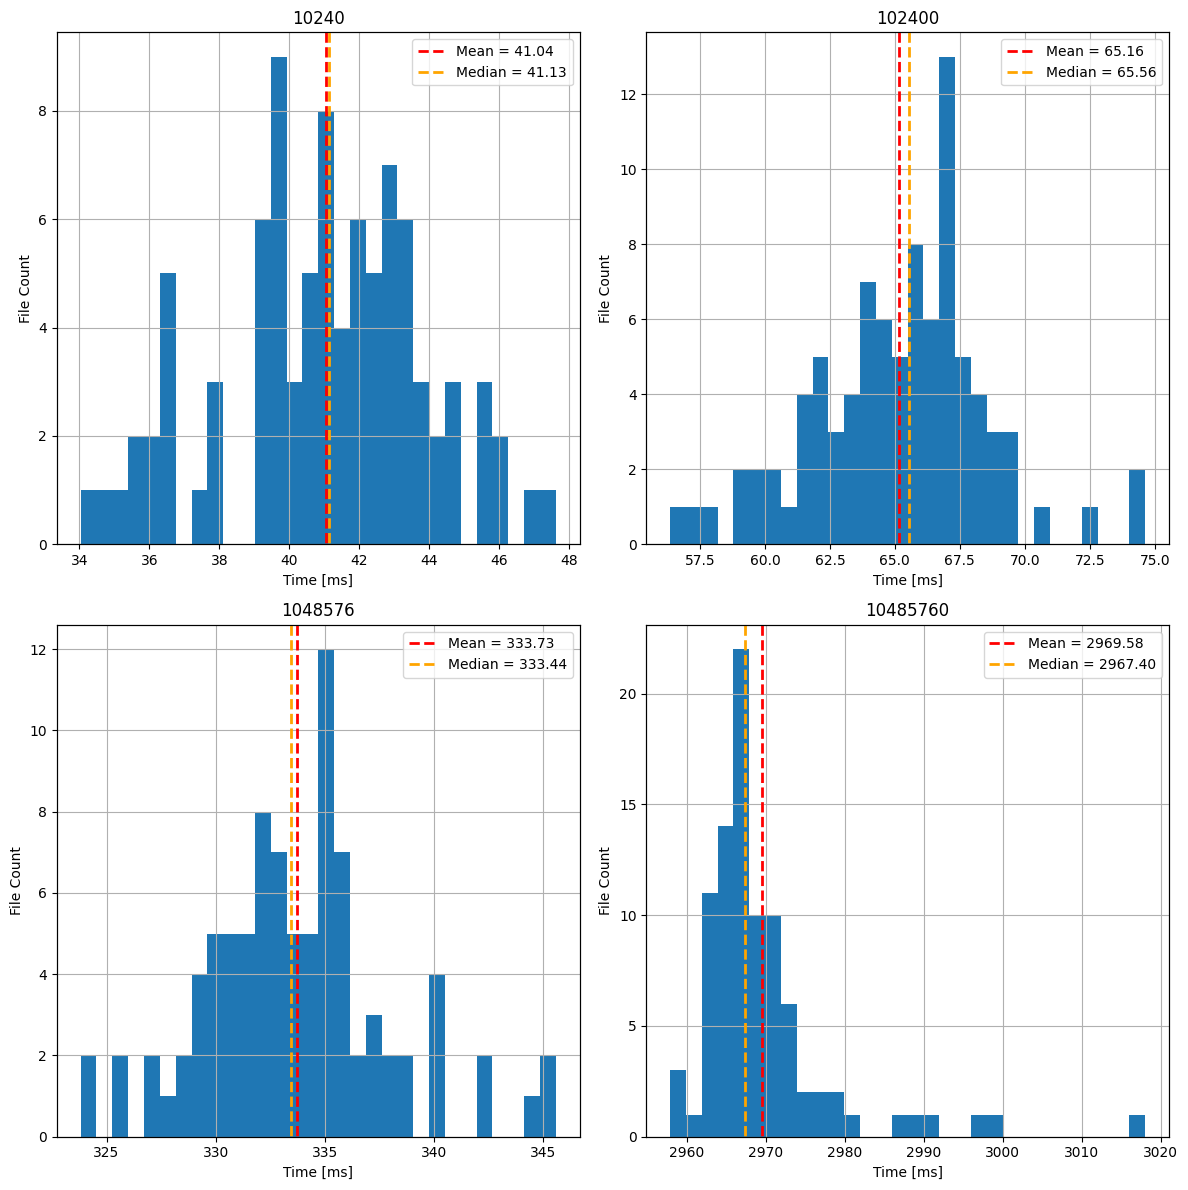

In [103]:
dfk2p = pd.DataFrame(load_postman('11k2'))
dfk2t = pd.DataFrame(load_textfile('11k2/times.txt'))

plot_hist(dfk2p)
plot_hist(dfk2t)

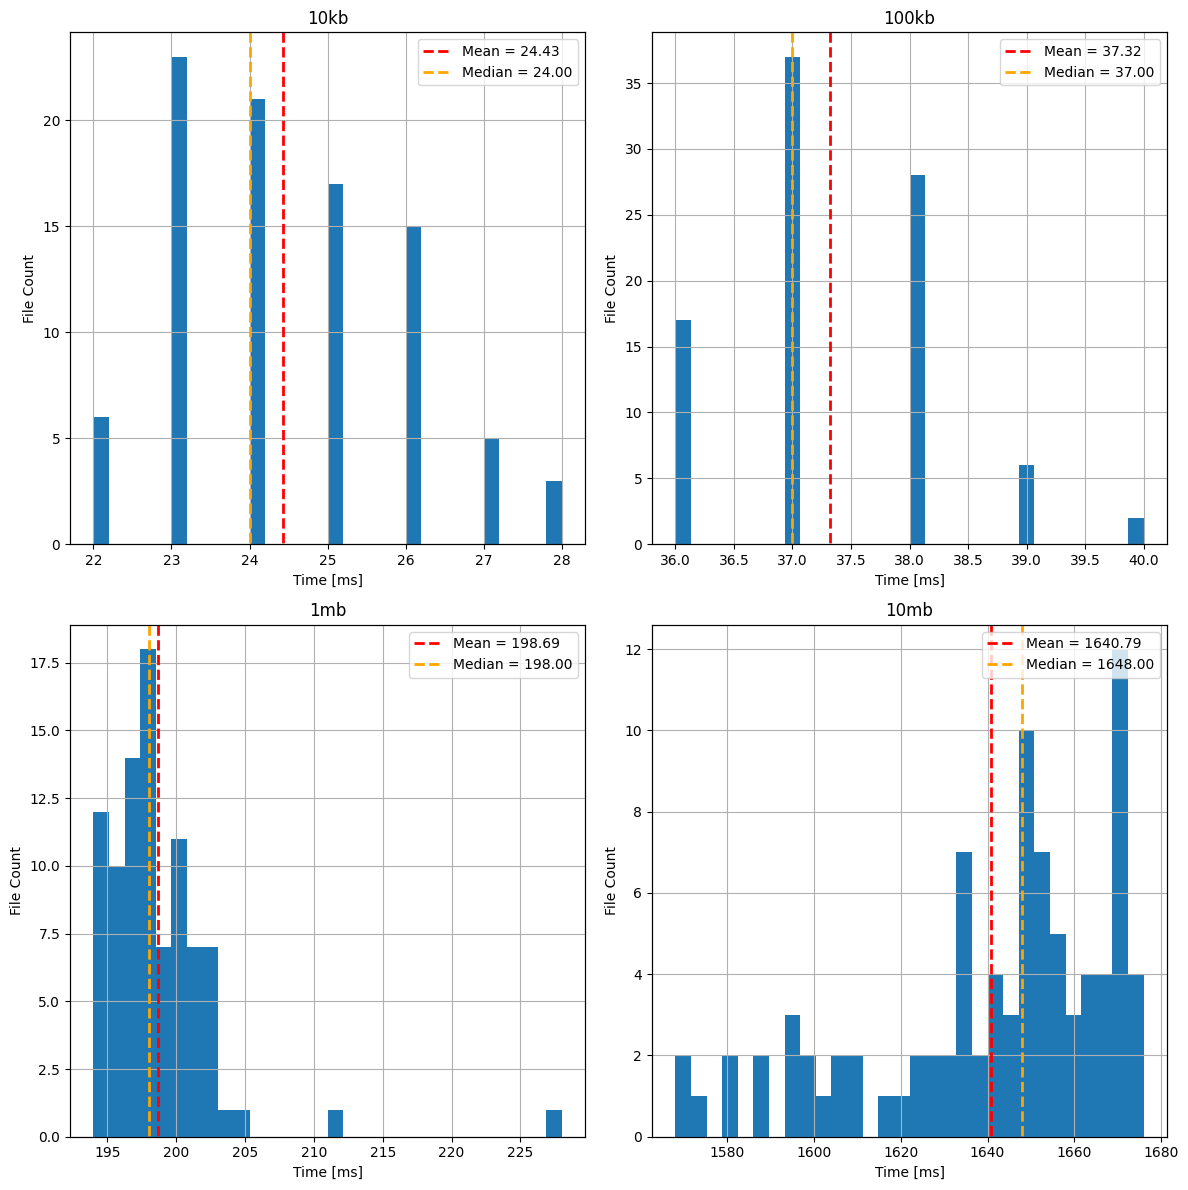

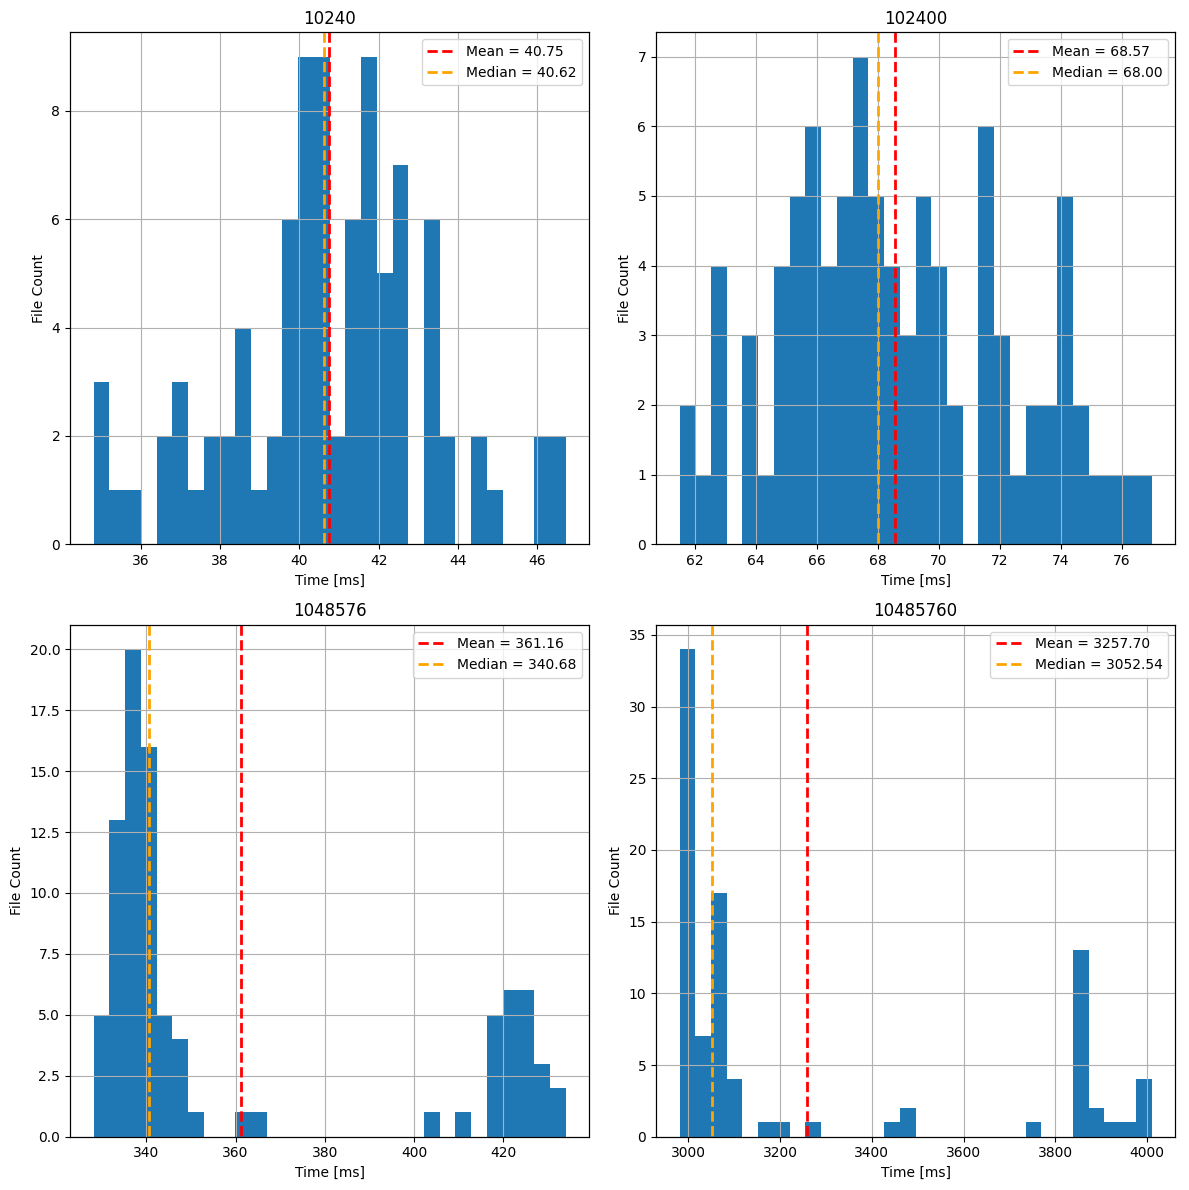

In [86]:
df3kp = pd.DataFrame(load_postman('11k3'))
df3kt = pd.DataFrame(load_textfile('11k3/times.txt'))

plot_hist(df3kp)
plot_hist(df3kt)

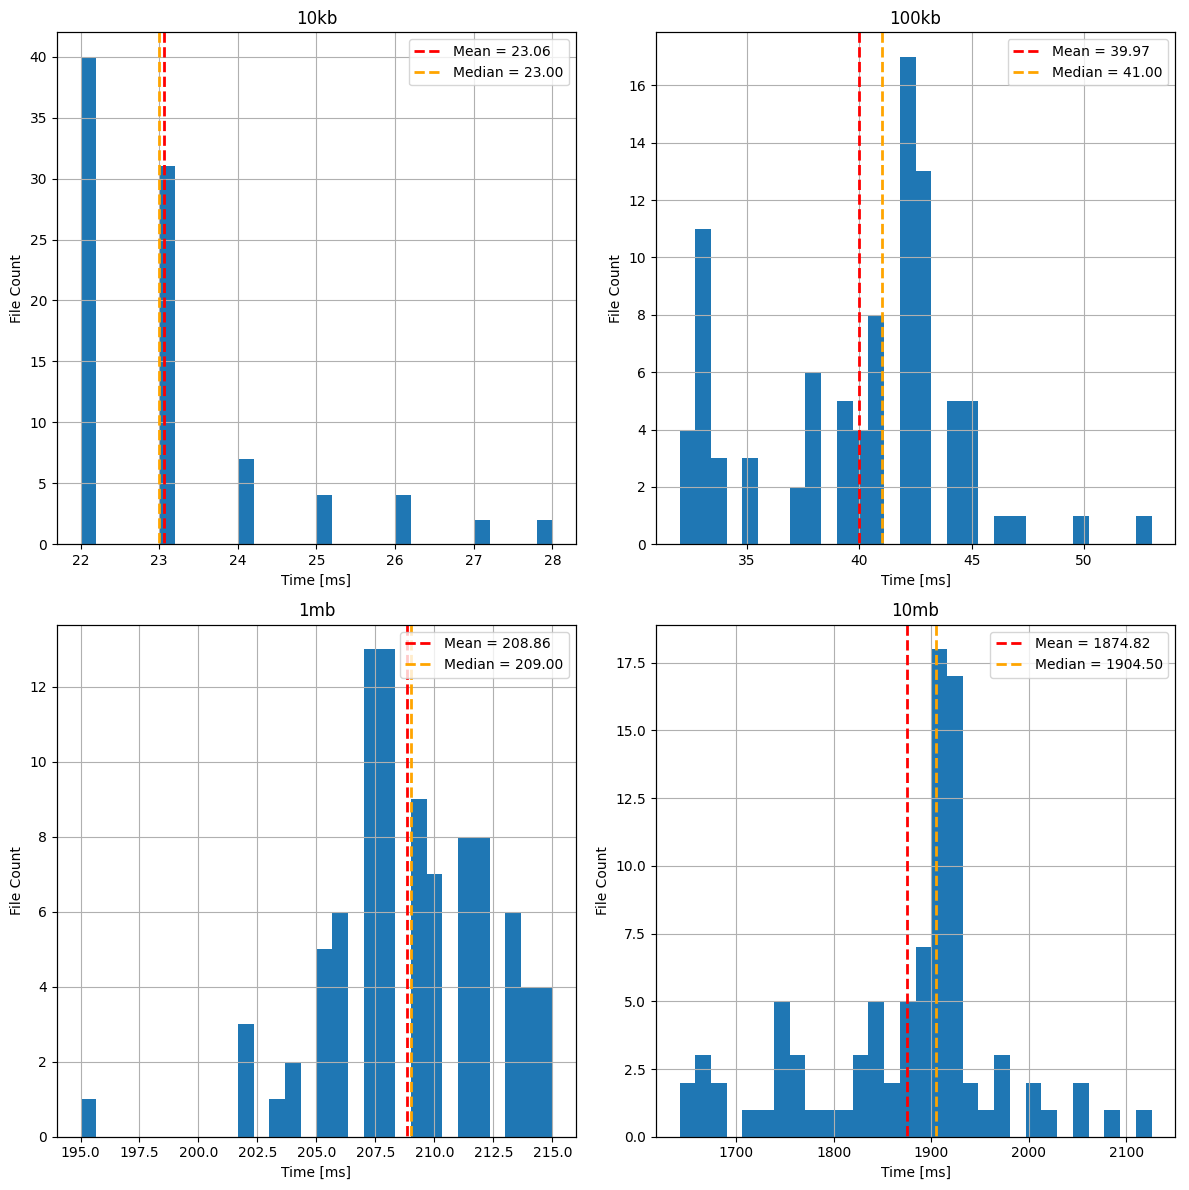

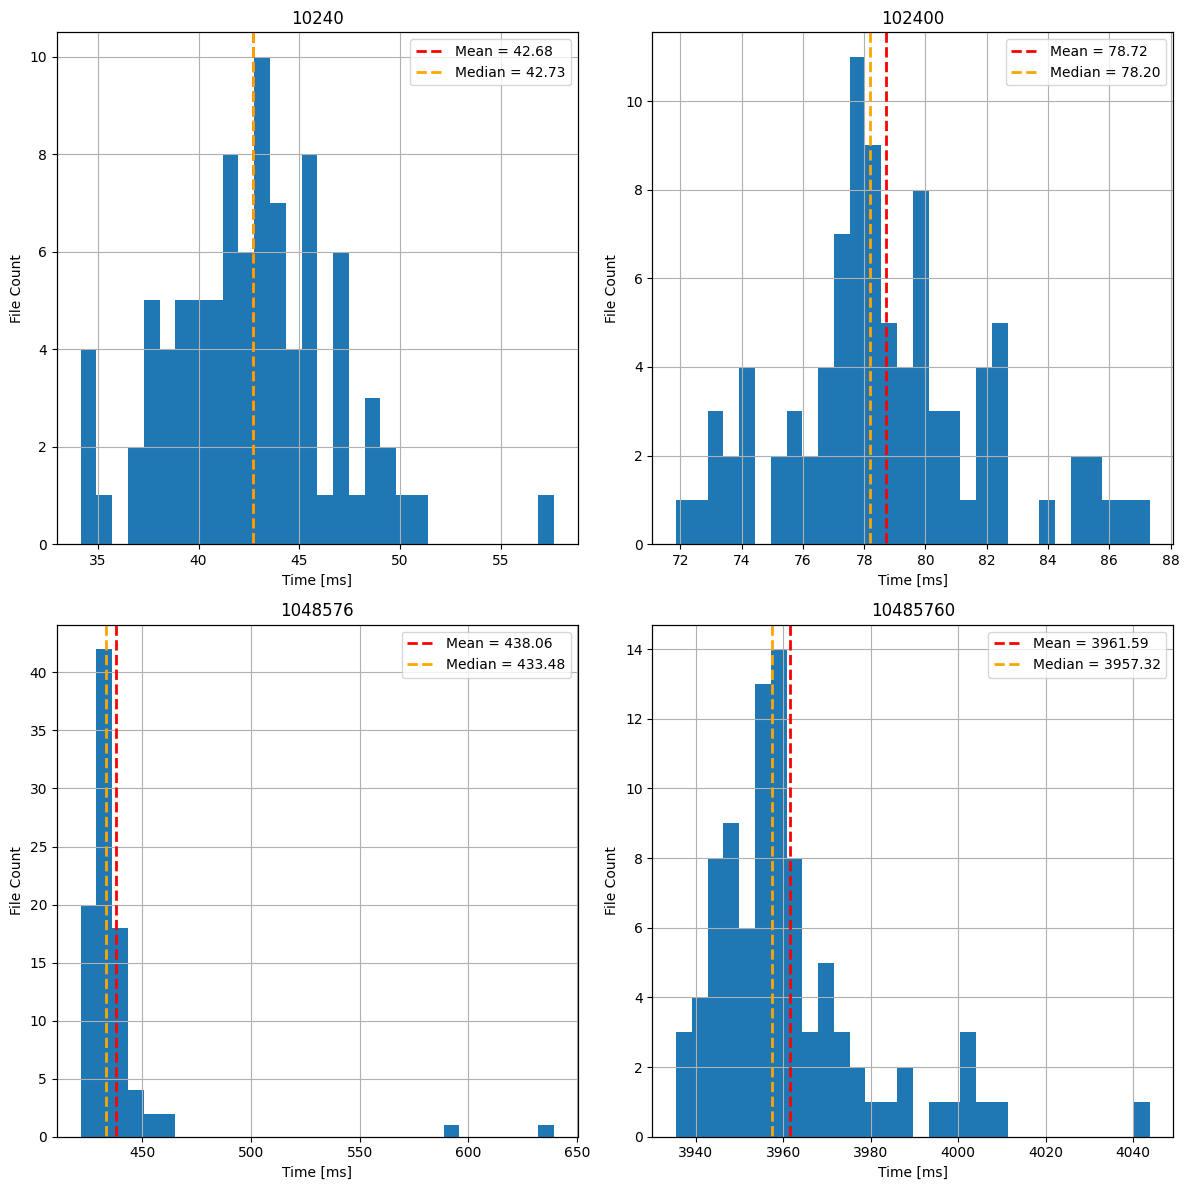

In [88]:
dfk4p = pd.DataFrame(load_postman('11k4'))
dfk4t = pd.DataFrame(load_textfile('11k4/times.txt'))

plot_hist(dfk4p)
plot_hist(dfk4t)

## Task 1.2

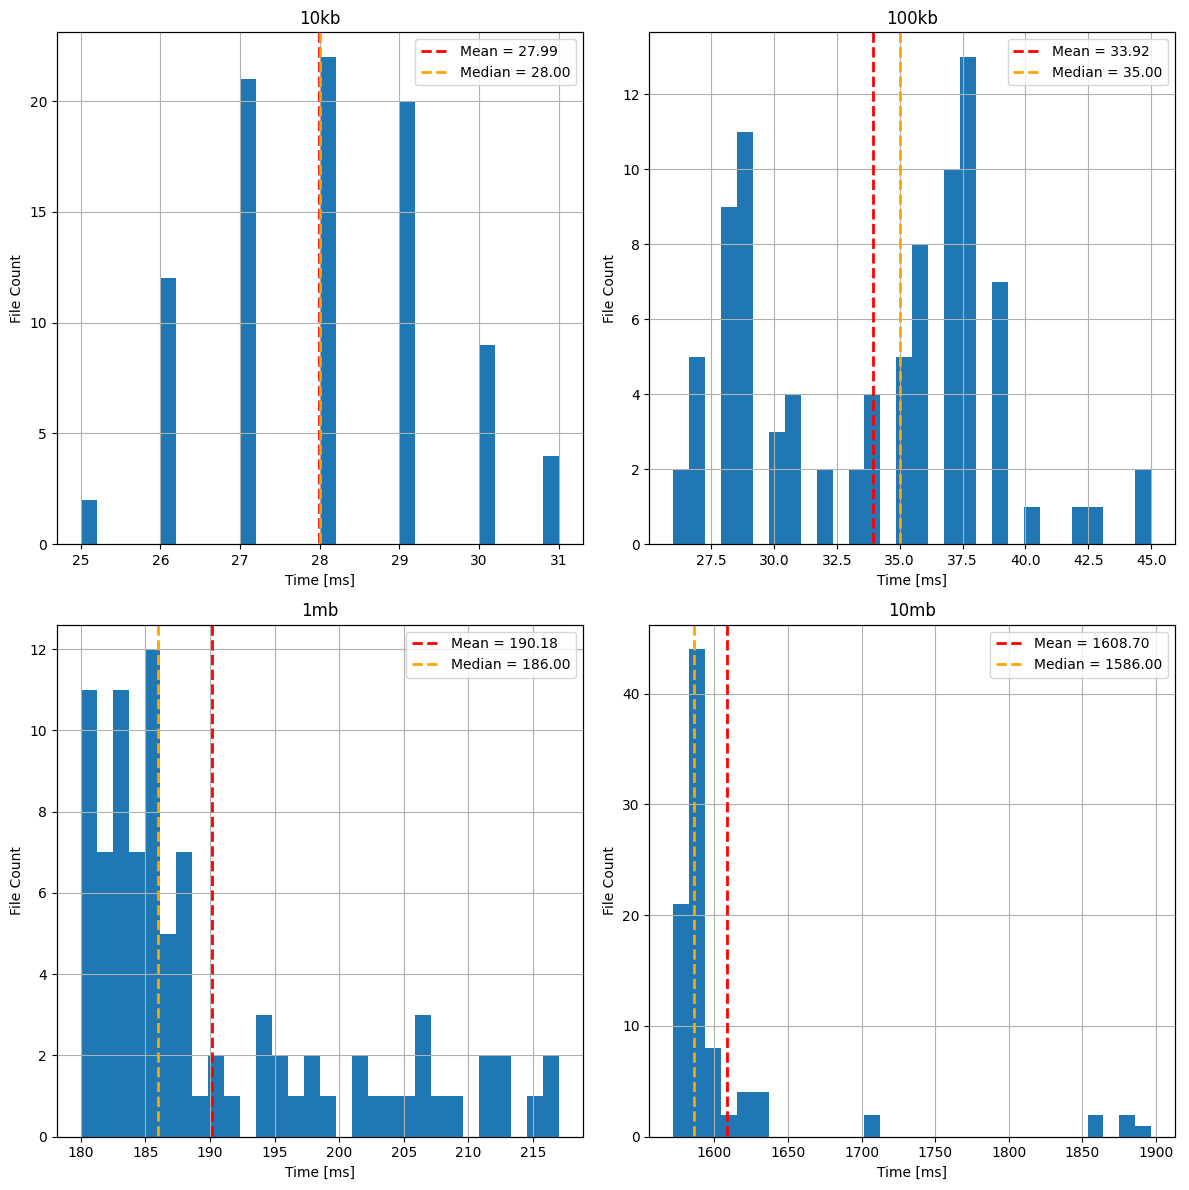

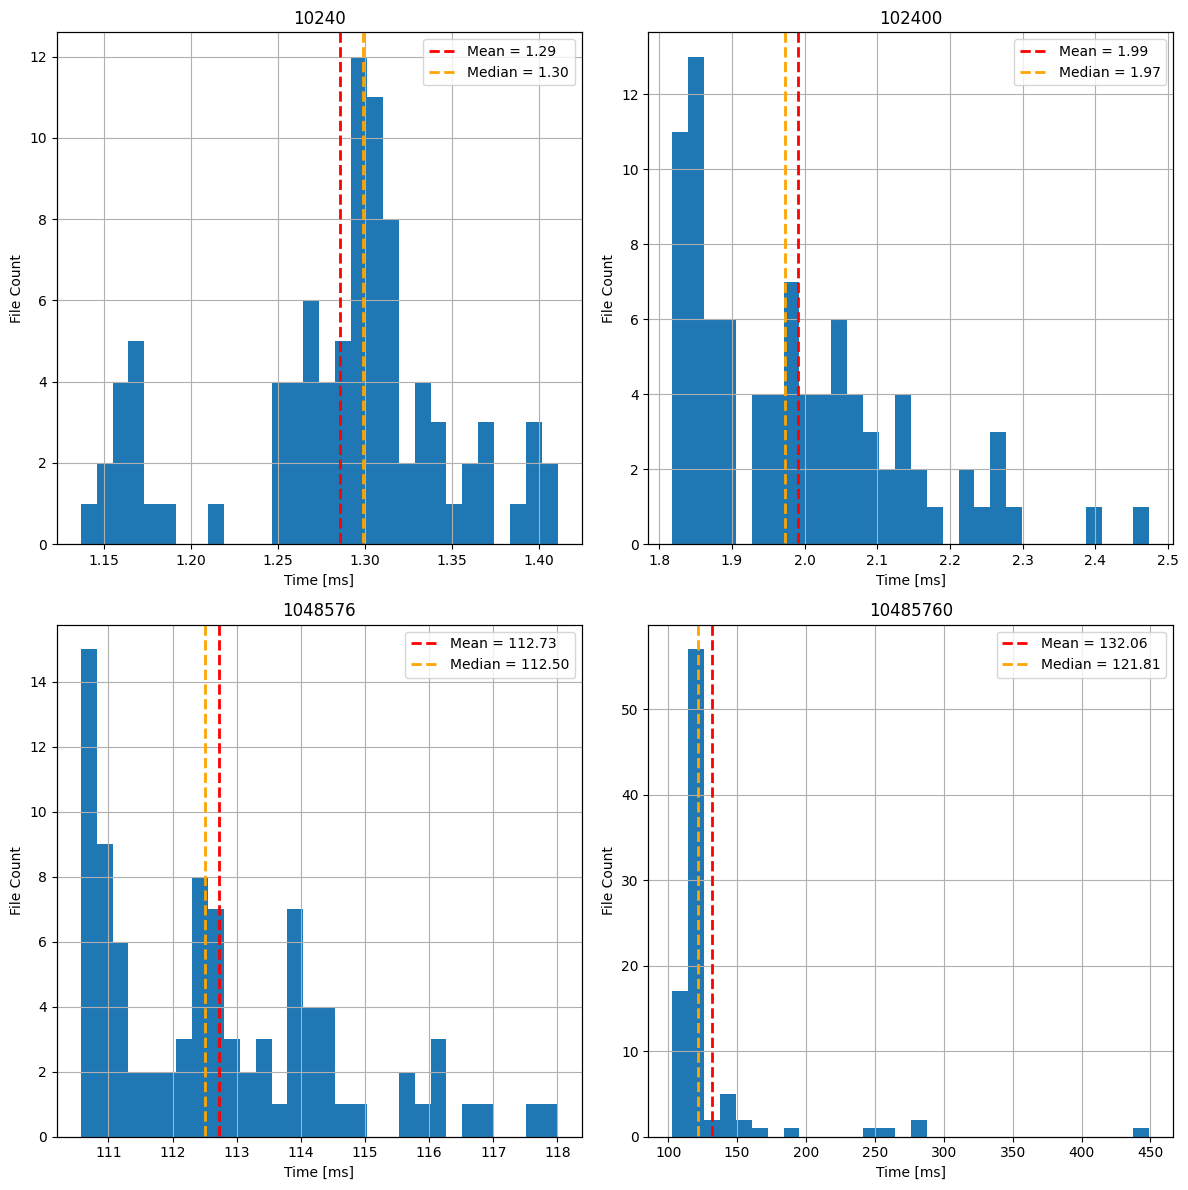

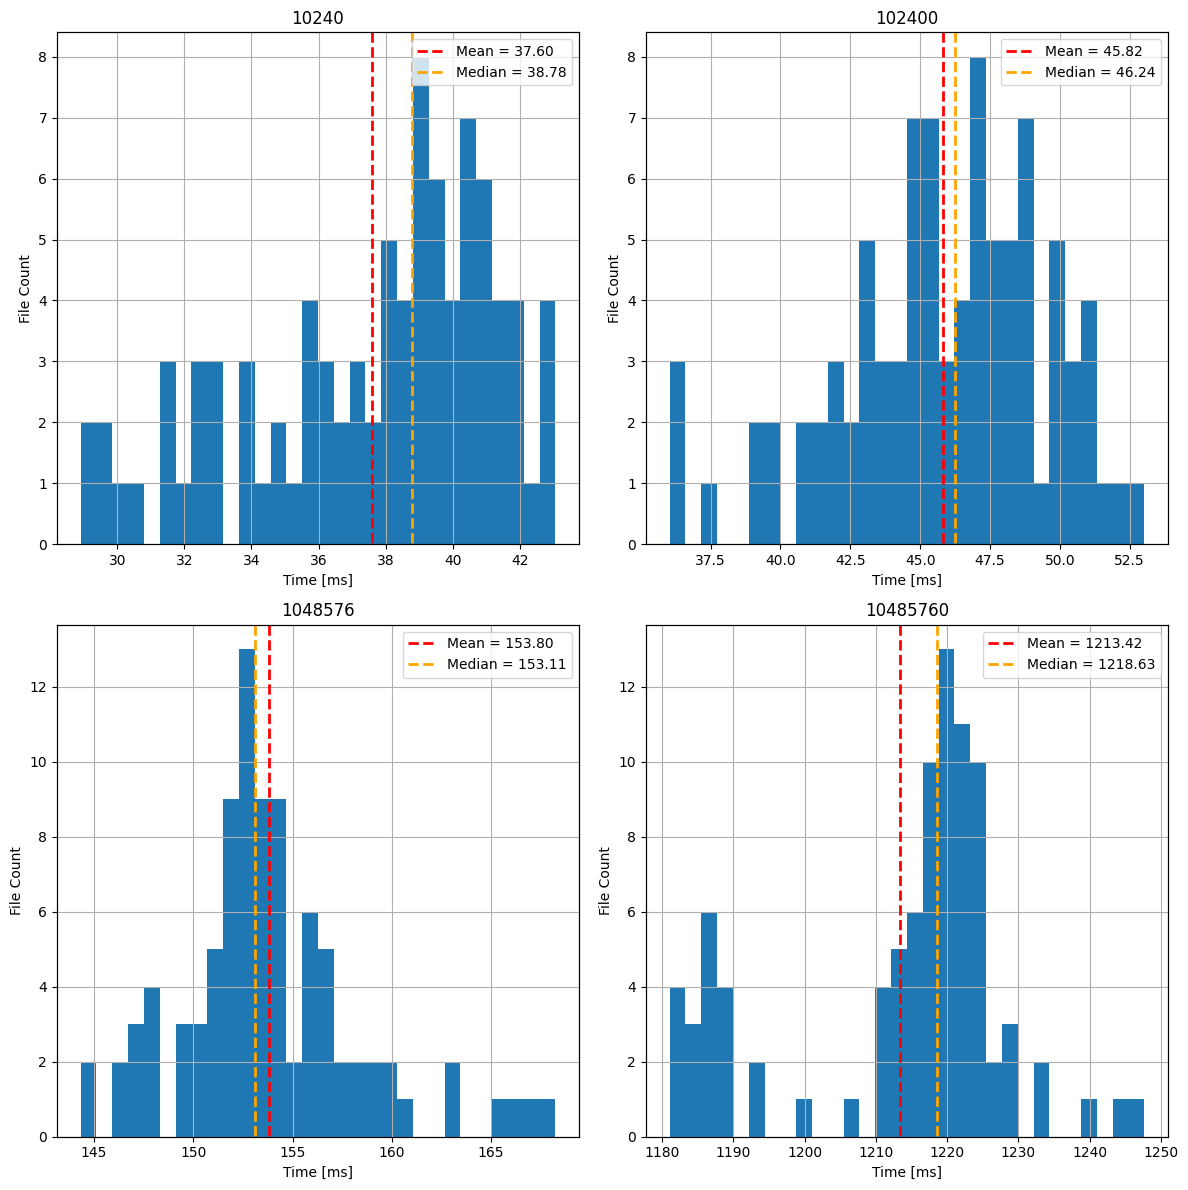

In [105]:
dfk2p = pd.DataFrame(load_postman('12k2'))
dfk2t = pd.DataFrame(load_textfile('12k2/leadTime.txt')).drop('13', axis=1)
dfk2s = pd.DataFrame(load_textfile('12k2/serverTime.txt'))

plot_hist(dfk2p)
plot_hist(dfk2t)
plot_hist(dfk2s)

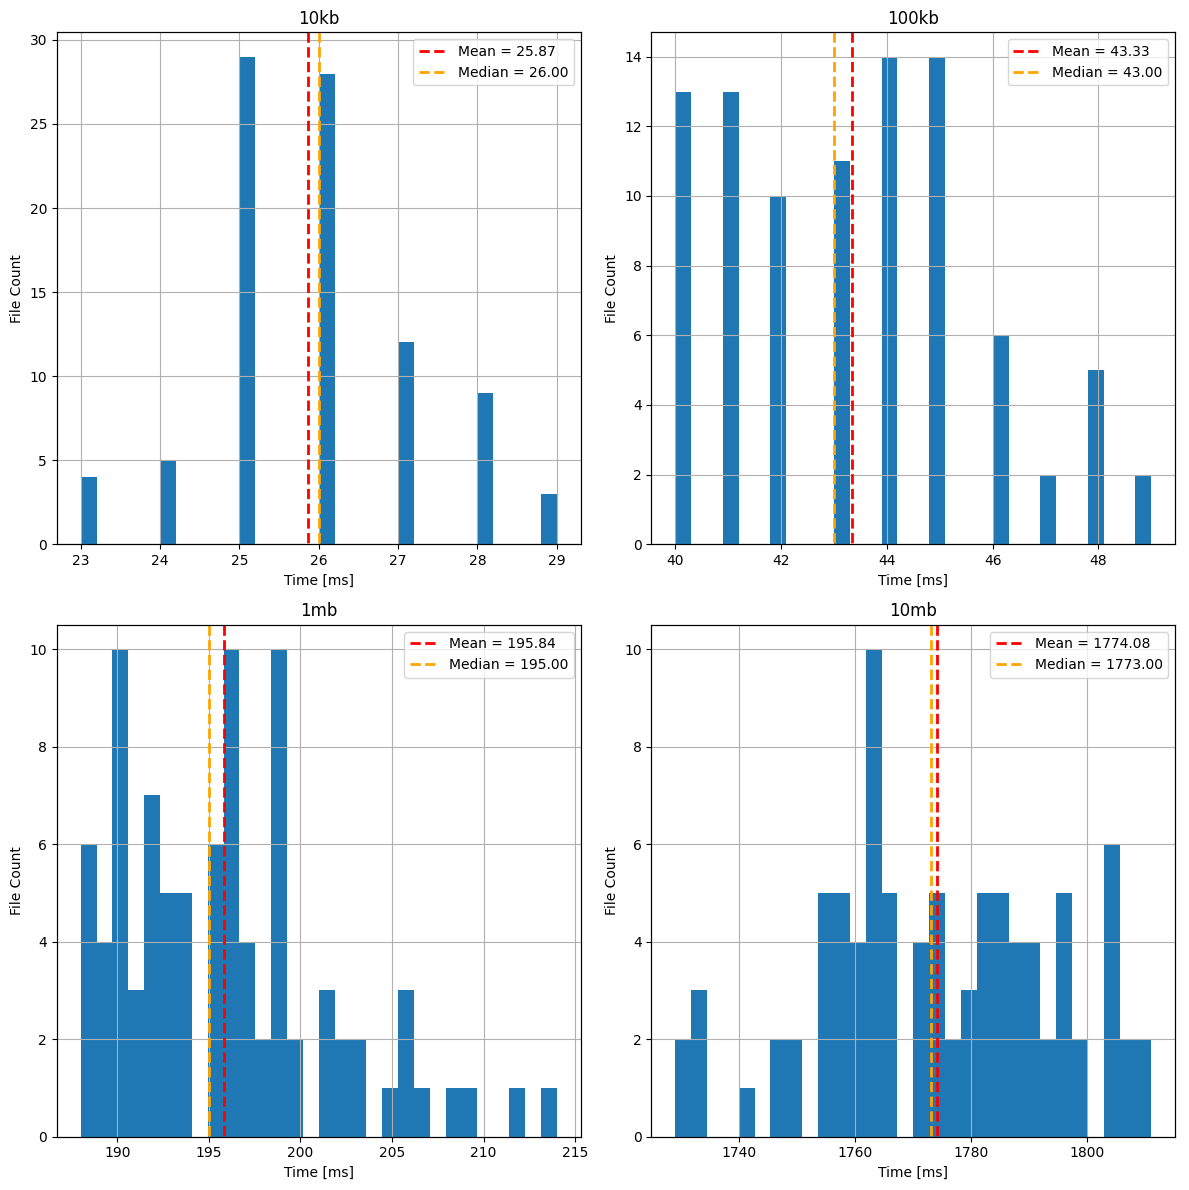

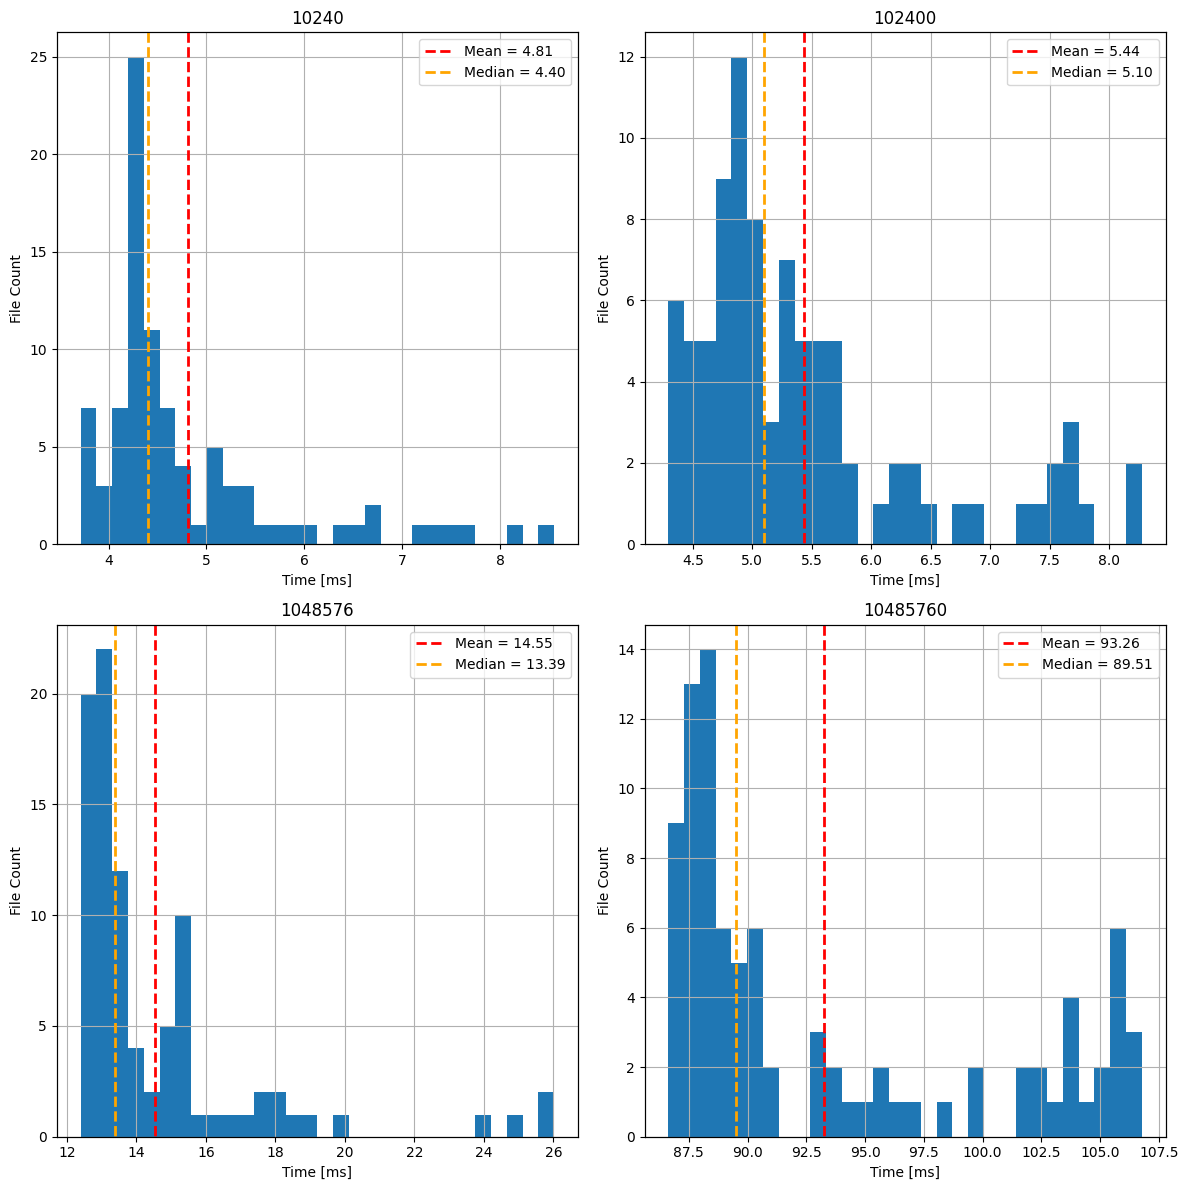

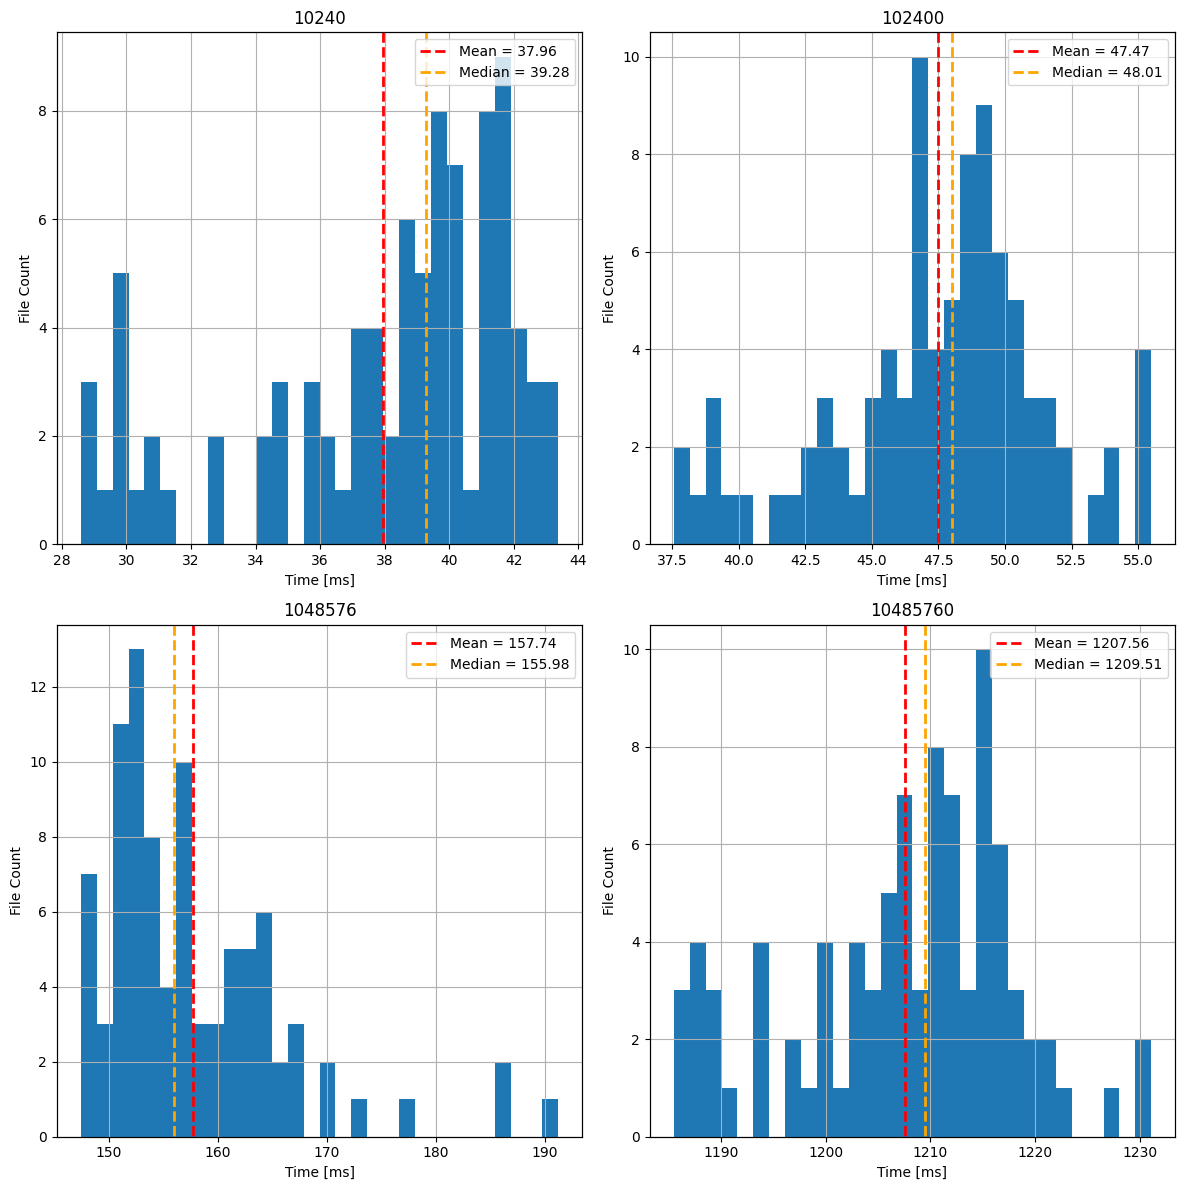

In [108]:
dfk3p = pd.DataFrame(load_postman('12k3'))
dfk3t = pd.DataFrame(load_textfile('12k3/leadTime.txt'))
dfk3s = pd.DataFrame(load_textfile('12k3/serverTime.txt'))

plot_hist(dfk3p)
plot_hist(dfk3t)
plot_hist(dfk3s)

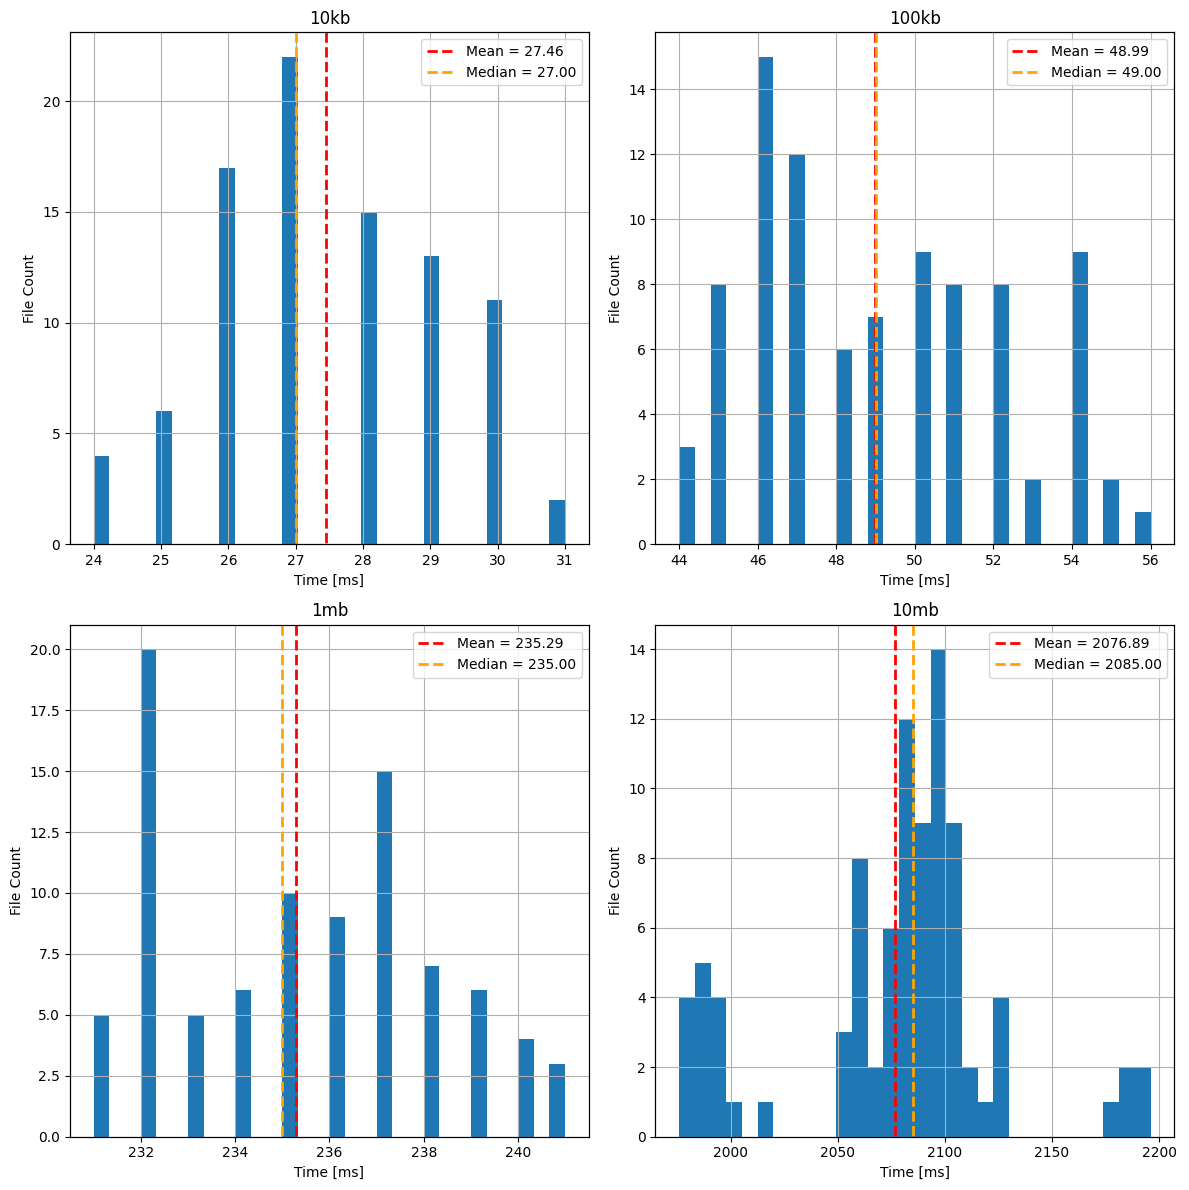

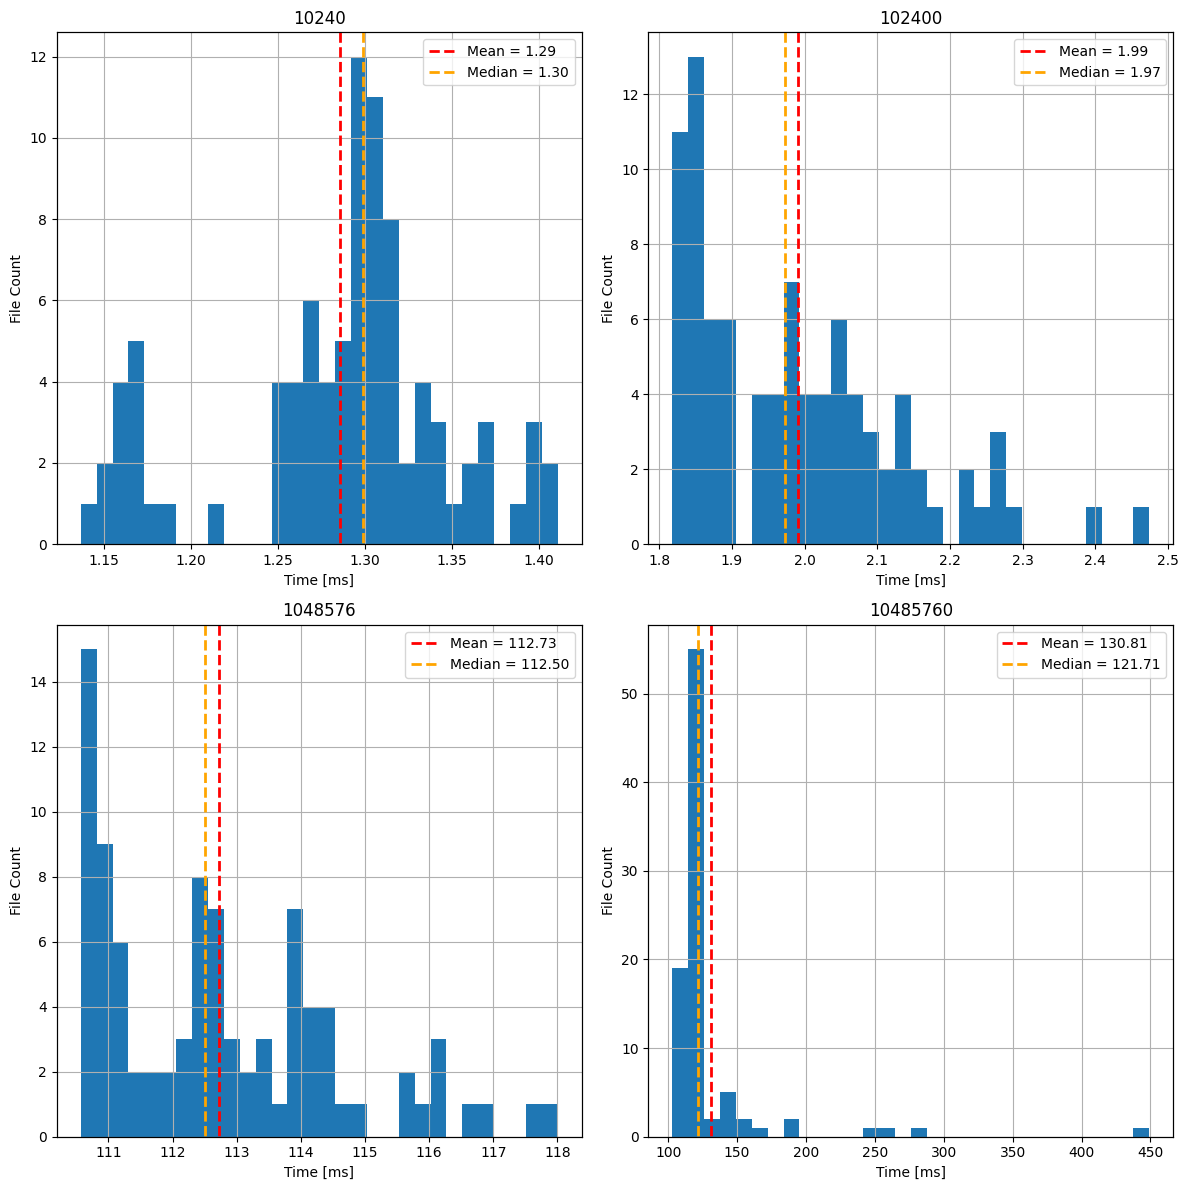

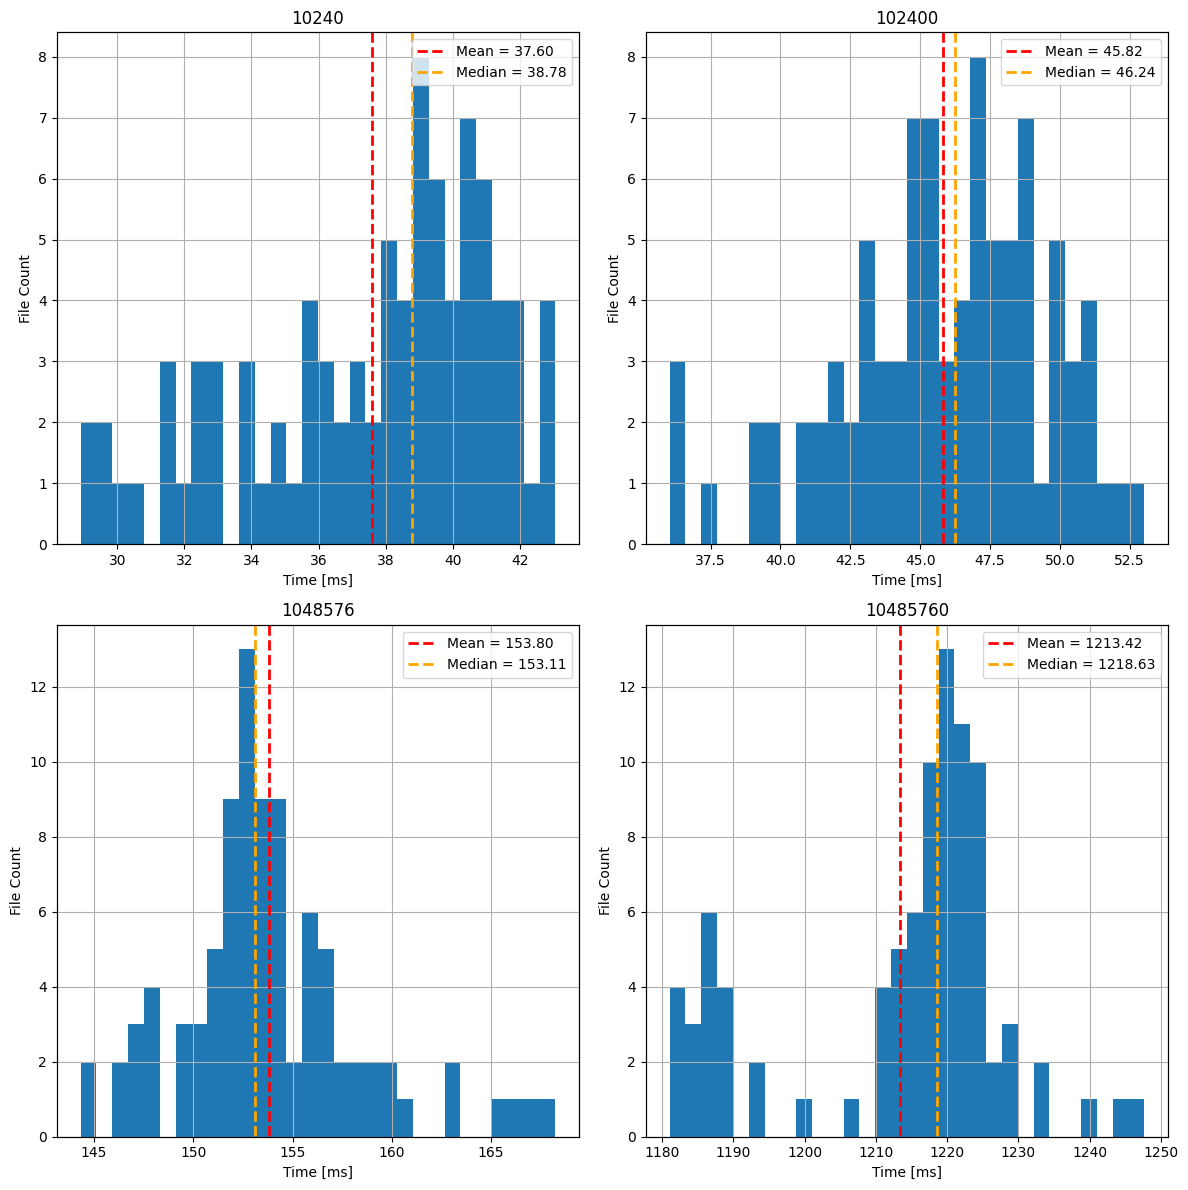

In [110]:
dfk4p = pd.DataFrame(load_postman('12k4'))
dfk4t = pd.DataFrame(load_textfile('12k4/leadTime.txt')).drop('13', axis=1)
dfk4s = pd.DataFrame(load_textfile('12k4/serverTime.txt'))

plot_hist(dfk4p)
plot_hist(dfk4t)
plot_hist(dfk4s)

## Task 2.1

In [132]:
def load_text_times(folder):
    file_size = ['10kb', '100kb', '1mb', '10mb']

    with open(folder, 'r') as f:
        times = f.read()
        
    results = {}
    for line in times.split('\n'):
        for line.split(': ')
        
        if len(r) > 1:
            size = r[1].split(',')

        if not len(results.get(size, [])):
            results[size] = []
        
        try:
            print(r)
            results[size].append(float(r) * 1000)
            print(results)
            break
        except ValueError:
            pass

    # remove 5 smallest and 5 highest
    for key in results.keys():
        results[key].sort()
        results[key] = results[key][5:95]
    return results

In [168]:
import re

arr = re.findall(r"\d+", "Size: 10240, TotalTime: 0.0650780200958252, EncodingTime: 0.028148651123046875")

new_arr = []
new_arr.append(arr[0])
new_arr.append(f'{arr[1]}.{arr[2]}')
new_arr.append(f'{arr[3]}.{arr[4]}')

new_arr

['10240', '0.0650780200958252', '0.028148651123046875']

In [133]:
dfl1p = pd.DataFrame(load_postman('21l1'))
dfl1l = pd.DataFrame(load_textfile('21l1/decoding_time.txt'))
dfl1t = pd.DataFrame(load_text_times('21l1/times.txt'))

# plot_hist(dfl21)
# plot_hist(dfk4t)
# plot_hist(dfk4s)

TypeError: unhashable type: 'list'

In [125]:
dfl1t

,10240,102400,1048576,10485760
0,19.448996,24.357796,115.606070,1090.072155
1,20.068407,26.589394,115.633011,1090.204716
2,20.396948,26.621819,115.860939,1090.471745
3,20.436525,26.768684,115.918875,1090.591431
4,20.538092,27.096510,116.022110,1091.881275
...,...,...,...,...
85,29.623985,36.700010,134.460926,1247.096062
86,29.787779,36.913157,135.187626,1264.380932
87,29.842615,36.938906,137.145519,1272.197247
88,30.141830,37.577391,139.241219,1288.860559
